In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from matplotlib import style
style.use('ggplot')

In [ ]:
iris=pd.read_csv("ird.csv")

In [ ]:
iris.head(1)

,slno,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0


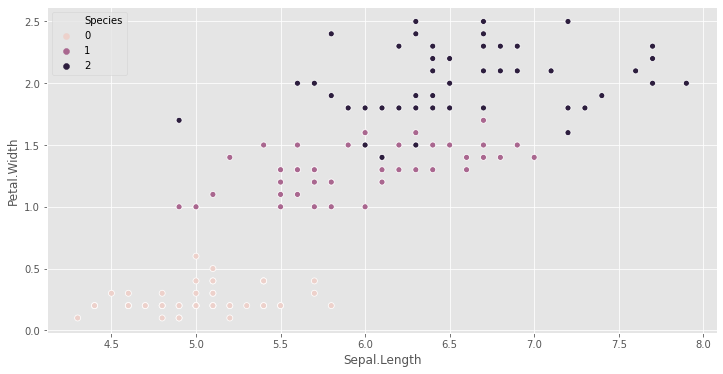

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=iris,x="Sepal.Length",y='Petal.Width',hue="Species")
plt.show()

In [ ]:
x=iris[["Sepal.Length",'Petal.Width']]
y=iris.Species

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install mlxtend

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
iris.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [ ]:
y_train.value_counts()

0    39
2    38
1    35
Name: Species, dtype: int64

In [ ]:
irisModel=LogisticRegression()

irisModel.fit(x_train,y_train)

print("Train SCore: ",irisModel.score(x_train,y_train))
print("Test SCore: ",irisModel.score(x_test,y_test))

Train SCore:  0.9375
Test SCore:  1.0


In [ ]:
from mlxtend.plotting import plot_decision_regions

TypeError: axis() got an unexpected keyword argument 'y_min'

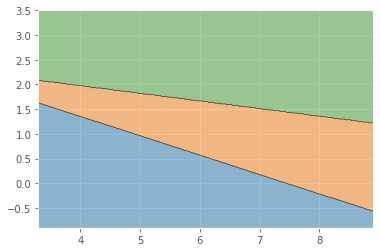

In [ ]:
plot_decision_regions(x_train.values,y_train.values,clf=irisModel)

In [ ]:
#lasso logistic model
irisModel=LogisticRegression(solver="liblinear",penalty="l1",C=.9) # c is regularization parameter

irisModel.fit(x_train,y_train)

print("Train SCore: ",irisModel.score(x_train,y_train))
print("Test SCore: ",irisModel.score(x_test,y_test))

Train SCore:  0.9196428571428571
Test SCore:  0.868421052631579


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#without any penalty
irisModel=LogisticRegression(penalty="none")

irisModel.fit(x_train,y_train)

print("Train SCore: ",irisModel.score(x_train,y_train))
print("Test SCore: ",irisModel.score(x_test,y_test))

Train SCore:  0.9553571428571429
Test SCore:  0.9736842105263158


In [ ]:
pd.crosstab(y_train,irisModel.predict(x_train))

col_0,0,1,2
Species,,,
0,39,0,0
1,0,27,8
2,0,1,37


In [ ]:
pd.crosstab(y_test,irisModel.predict(x_test))

col_0,0,1,2
Species,,,
0,11,0,0
1,0,11,4
2,0,1,11


In [ ]:
#only for binary classification
from sklearn.metrics import roc_curve, auc

In [ ]:
prob_train=irisModel.predict_proba(x_train)[:,1]

In [ ]:
fpr,tpr,threshold=roc_curve(y_train,prob_train)